# Homework 2: Bayesian Classifiers

Follow the instructions in the template, score will be given uppon it.

### Submission details: 
- 
- ...

### Import libraries
You are allowed to use these libraries only.

In [1]:
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load external data

In [2]:
train_df = pd.read_csv('HW2 - train.csv')
test_df = pd.read_csv('HW2 - test.csv')

Use pandas groupby technique to print the ```mean``` ,  ```std```  and ```size``` for ```w1``` and ```w2```   

** Note: classes are represented as 0 and 1 to w1 and w2 respectively**

In [3]:
grouped = train_df.groupby('Label')
grouped['Value'].agg([np.mean,np.std,np.size])

,mean,std,size
Label,,,
0.0,56.984812,4.010307,100000.0
1.0,61.998773,4.997511,100000.0


Since the data is only one dimensional, we can plot it. Plot the values as a one dim scatter plot and with respect to the labels as colors:

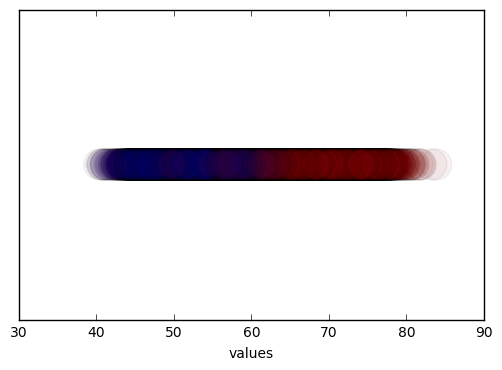

In [4]:
plt.yticks([])
plt.xlabel('values')
plt.scatter(train_df['Value'].reshape(-1, 1),[0]*len(train_df['Value'].reshape(-1, 1)),s=500,c= train_df['Label'],alpha=0.05)

Create a naive bayes classifier using sklearn package, and train it based on your training set.

In [5]:
clf = GaussianNB()
clf.fit(train_df['Value'].reshape(-1, 1),train_df['Label'])

GaussianNB()

Output number of misclassifications in the trainning set: (predicted 0 but was actual 1, predicted 0 but was actual 1)


In [6]:
np.sum(np.logical_xor(clf.predict(train_df['Value'].reshape(-1, 1)).astype(bool),train_df['Label']).astype(bool))

57290

Classify (predict) the **test** observations using the bayes classifier you found above. Output the number of misclassifications you found

In [7]:
np.sum(np.logical_xor(clf.predict(test_df['Value'].reshape(-1, 1)).astype(bool),test_df['Label']).astype(bool))

3210

Find the mean and the std of each class using your fitted attributes of the trained model.

In [8]:
zip(clf.theta_ , np.sqrt(clf.sigma_))

[(array([ 56.98481171]), array([ 4.01028743])),
 (array([ 61.99877326]), array([ 4.99748581]))]

Plot a line that shows the probabilty of an instance to be predicted as w1.

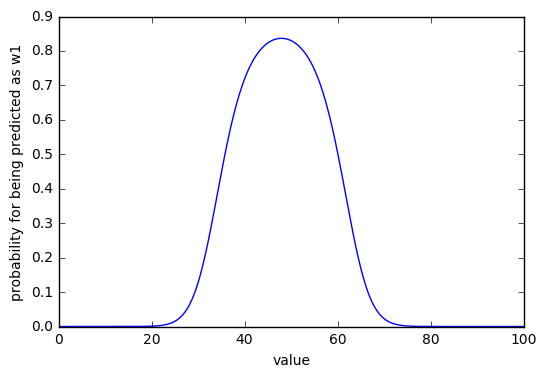

In [9]:
z = clf.predict_proba(np.linspace(0,100,num=1000).reshape(-1, 1))[:,0]
plt.ylabel('probability for being predicted as w1')
plt.xlabel('value')
plt.plot(np.linspace(0,100,num=1000).reshape(-1, 1),z)

Without creating a new dataset, what would happen if the variance of w1 will be extremely small? how  the curve would look like?

<I> The tails of the pdf will be thinner. <I>